In [1]:
import torchvision
print(torchvision.__version__)

from google.colab import drive
drive.mount("/content/gdrive")

0.14.0+cu116
Mounted at /content/gdrive


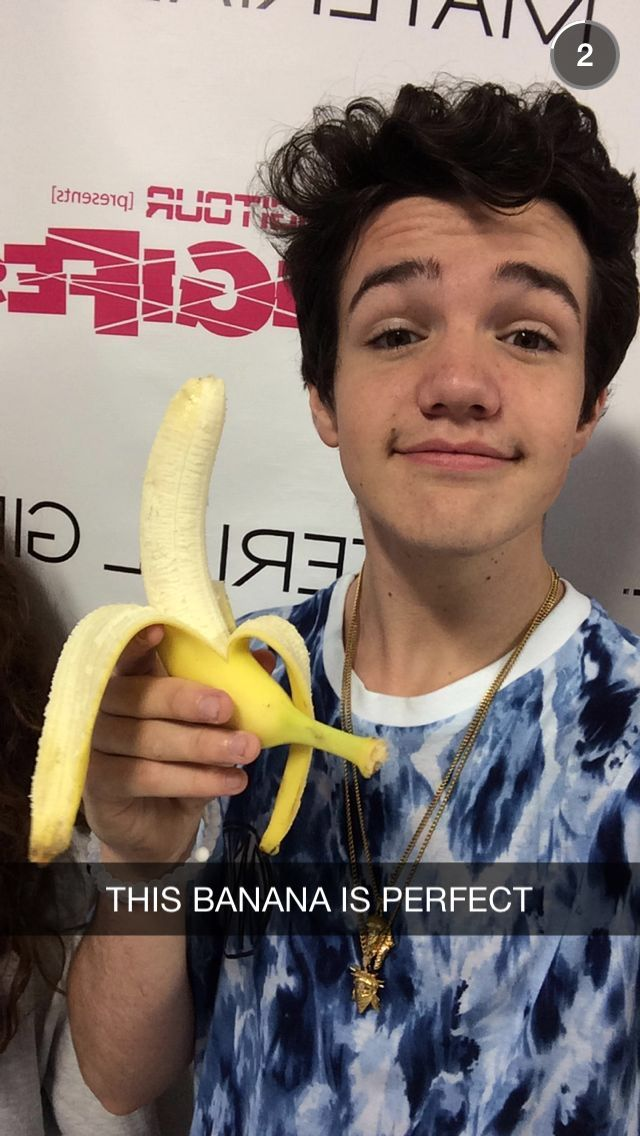

In [2]:
from google.colab.patches import cv2_imshow
import cv2

img = "/content/gdrive/MyDrive/Colab Notebooks/SKT_FLY_AI/project/image/q4.jpg"
img = cv2.imread(img, cv2.IMREAD_COLOR)

img_copy = img.copy()
cv2_imshow(img)

In [3]:
from torchvision.io.image import read_image
from torchvision.models.segmentation import fcn_resnet50, FCN_ResNet50_Weights, fcn_resnet101, FCN_ResNet101_Weights
from torchvision.models.segmentation import deeplabv3_resnet50, deeplabv3_resnet101, DeepLabV3_ResNet50_Weights, DeepLabV3_ResNet101_Weights 
from torchvision.transforms.functional import to_pil_image
from google.colab.patches import cv2_imshow


# 1 : fcn_resnet50
# 2 : fcn_resnet101
# 3 : deeplabv3_resnet50
# 4 : deeplabv3_resnet101

# Step 1: Initialize model with the best available weights
weights1 = FCN_ResNet50_Weights.DEFAULT
model1 = fcn_resnet50(weights=weights1)
model1.eval()

weights2 = FCN_ResNet101_Weights.DEFAULT
model2 = fcn_resnet101(weights=weights2)
model2.eval()

weights3 = DeepLabV3_ResNet50_Weights.DEFAULT
model3 = deeplabv3_resnet50(weights=weights3)
model3.eval()

weights4 = DeepLabV3_ResNet101_Weights.DEFAULT
model4 = deeplabv3_resnet101(weights=weights4)
model4.eval()


# Step 2: Initialize the inference transforms
preprocess1 = weights1.transforms()
preprocess2 = weights2.transforms()
preprocess3 = weights3.transforms()
preprocess4 = weights4.transforms()

Downloading: "https://download.pytorch.org/models/fcn_resnet50_coco-1167a1af.pth" to /root/.cache/torch/hub/checkpoints/fcn_resnet50_coco-1167a1af.pth


  0%|          | 0.00/135M [00:00<?, ?B/s]

Downloading: "https://download.pytorch.org/models/fcn_resnet101_coco-7ecb50ca.pth" to /root/.cache/torch/hub/checkpoints/fcn_resnet101_coco-7ecb50ca.pth


  0%|          | 0.00/208M [00:00<?, ?B/s]

Downloading: "https://download.pytorch.org/models/deeplabv3_resnet50_coco-cd0a2569.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet50_coco-cd0a2569.pth


  0%|          | 0.00/161M [00:00<?, ?B/s]

Downloading: "https://download.pytorch.org/models/deeplabv3_resnet101_coco-586e9e4e.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet101_coco-586e9e4e.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [4]:
# img = read_image("gallery/assets/dog1.jpg")
img = read_image("/content/gdrive/MyDrive/Colab Notebooks/SKT_FLY_AI/project/image/person.jpg")


# Step 3: Apply inference preprocessing transforms
batch1 = preprocess1(img).unsqueeze(0)
batch2 = preprocess2(img).unsqueeze(0)
batch3 = preprocess3(img).unsqueeze(0)
batch4 = preprocess4(img).unsqueeze(0)


# Step 4: Use the model and visualize the prediction
prediction1 = model1(batch1)["out"]
normalized_masks1 = prediction1.softmax(dim=1)
print(normalized_masks1.shape, "\n\n")

prediction2 = model2(batch2)["out"]
normalized_masks2 = prediction2.softmax(dim=1)

prediction3 = model3(batch3)["out"]
normalized_masks3 = prediction3.softmax(dim=1)

prediction4 = model4(batch4)["out"]
normalized_masks4 = prediction4.softmax(dim=1)


class_to_idx = {cls: idx for (idx, cls) in enumerate(weights1.meta["categories"])}
print(class_to_idx)
mask1 = normalized_masks1[0, class_to_idx["person"]]   # 첫번째 인자는 배치, 두번째 인자는 지정할 카테고리
mask2 = normalized_masks2[0, class_to_idx["person"]]
mask3 = normalized_masks3[0, class_to_idx["person"]]
mask4 = normalized_masks4[0, class_to_idx["person"]]

torch.Size([1, 21, 520, 780]) 


{'__background__': 0, 'aeroplane': 1, 'bicycle': 2, 'bird': 3, 'boat': 4, 'bottle': 5, 'bus': 6, 'car': 7, 'cat': 8, 'chair': 9, 'cow': 10, 'diningtable': 11, 'dog': 12, 'horse': 13, 'motorbike': 14, 'person': 15, 'pottedplant': 16, 'sheep': 17, 'sofa': 18, 'train': 19, 'tvmonitor': 20}


In [ ]:
print(normalized_masks1.shape)

torch.Size([1, 21, 520, 780])


In [5]:
tmp = model1(batch1)
print(tmp.keys())

odict_keys(['out', 'aux'])


In [ ]:
print(weights1.meta["categories"], "\n")
print(weights2.meta["categories"], "\n")
print(weights3.meta["categories"], "\n")
print(weights4.meta["categories"], "\n")

['__background__', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor'] 

['__background__', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor'] 

['__background__', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor'] 

['__background__', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor'] 



In [6]:
import numpy as np

mask_numpy1 = mask1.detach().numpy()
mask_numpy1 = (mask_numpy1 * 255).astype("uint8")

mask_numpy2 = mask2.detach().numpy()
mask_numpy2 = (mask_numpy2 * 255).astype("uint8")

mask_numpy3 = mask3.detach().numpy()
mask_numpy3 = (mask_numpy3 * 255).astype("uint8")

mask_numpy4 = mask4.detach().numpy()
mask_numpy4 = (mask_numpy4 * 255).astype("uint8")

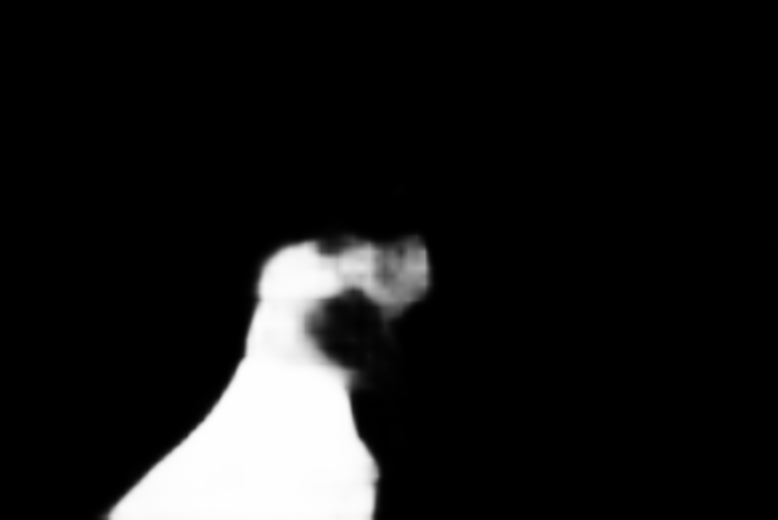

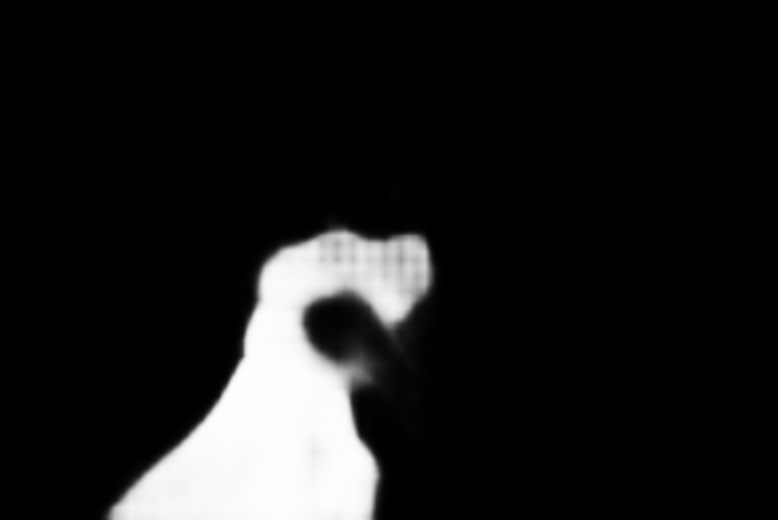

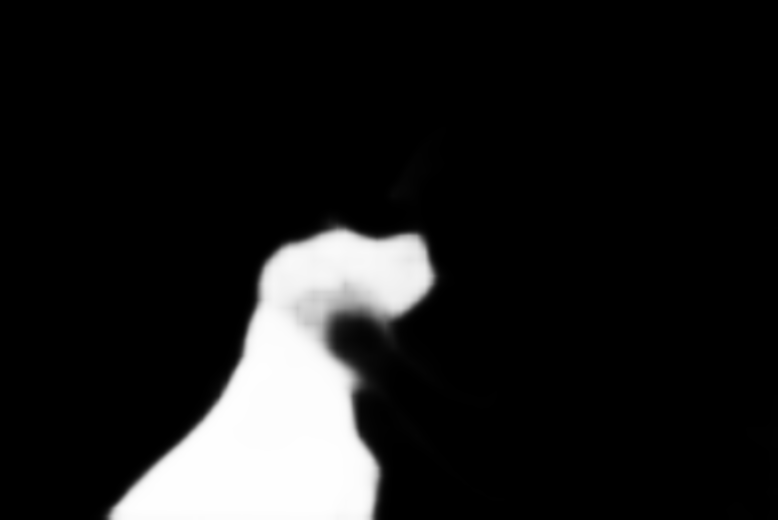

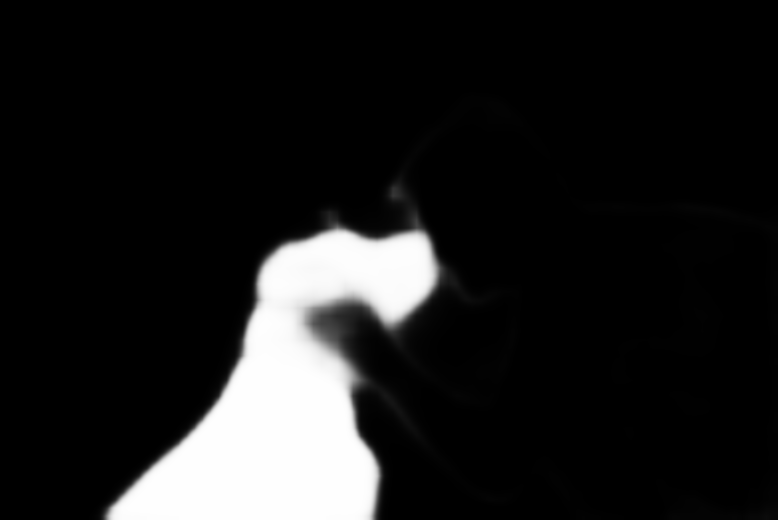

In [ ]:
from google.colab.patches import cv2_imshow

cv2_imshow(mask_numpy1)
cv2_imshow(mask_numpy2)
cv2_imshow(mask_numpy3)
cv2_imshow(mask_numpy4)

In [7]:
img_copy1 = cv2.resize(img_copy, (mask_numpy1.shape[1], mask_numpy1.shape[0]))
_, mask_numpy1 = cv2.threshold(mask_numpy1, 128, 255, cv2.THRESH_BINARY)
dst1 = cv2.bitwise_and(img_copy1, img_copy1, mask=mask_numpy1)

img_copy2 = cv2.resize(img_copy, (mask_numpy2.shape[1], mask_numpy2.shape[0]))
_, mask_numpy2 = cv2.threshold(mask_numpy2, 128, 255, cv2.THRESH_BINARY)
dst2 = cv2.bitwise_and(img_copy2, img_copy2, mask=mask_numpy2)

img_copy3 = cv2.resize(img_copy, (mask_numpy3.shape[1], mask_numpy3.shape[0]))
_, mask_numpy3 = cv2.threshold(mask_numpy3, 128, 255, cv2.THRESH_BINARY)
dst3 = cv2.bitwise_and(img_copy3, img_copy3, mask=mask_numpy3)

img_copy4 = cv2.resize(img_copy, (mask_numpy4.shape[1], mask_numpy4.shape[0]))
_, mask_numpy4 = cv2.threshold(mask_numpy4, 128, 255, cv2.THRESH_BINARY)
dst4 = cv2.bitwise_and(img_copy4, img_copy4, mask=mask_numpy4)






cv2_imshow(dst1)
cv2_imshow(dst2)
cv2_imshow(dst3)
cv2_imshow(dst4)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
cv2.imwrite("/content/gdrive/MyDrive/Colab Notebooks/SKT_FLY_AI/project/image/test_dog2_result1.jpg", dst1)
cv2.imwrite("/content/gdrive/MyDrive/Colab Notebooks/SKT_FLY_AI/project/image/test_dog2_result2.jpg", dst2)
cv2.imwrite("/content/gdrive/MyDrive/Colab Notebooks/SKT_FLY_AI/project/image/test_dog2_result3.jpg", dst3)
cv2.imwrite("/content/gdrive/MyDrive/Colab Notebooks/SKT_FLY_AI/project/image/test_dog2_result4.jpg", dst4)



True

In [ ]:
import matplotlib.pyplot as plt

# to_pil_image(mask).show()
# plt.imshow(to_pil_image(mask), cmap="gray")
plt.imshow(to_pil_image(mask))

NameError: ignored

In [ ]:
from torchvision.utils import save_image

mask = mask.detach()
save_image(mask, 'after.png')